In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

infos = pd.read_excel("../../1_analysis_of_rna_seq/RNAseq.xls")
infos = infos[~infos["Replicate"].isna()]
samples = list(infos["Sample"])

In [9]:
array = []
for sample in samples:
    path = "../../1_analysis_of_rna_seq/results/denovo_mapping/star/mapped.2nd/%s/Log.final.out" % sample
    d = dict()
    with open(path) as f:
        for line in f:
            if "|" in line:
                k, v = line.strip("\n").split("|")
                d[k.strip()] = v.strip()
    array.append(d)
dat = pd.DataFrame(array)

In [16]:
d = dat[[
    "Uniquely mapped reads %", 
    "% of reads mapped to multiple loci", 
    "% of reads mapped to too many loci", 
    "% of reads unmapped: too short", 
    "% of reads unmapped: other"]]
rows = []
for row in d.values:
    row = [float(x[:-1]) for x in row]
    v1, v2, v3, v4, v5 = row
    rows.append([v1, v2 + v3, v4, v5])
m = pd.DataFrame(rows, columns=["UniqueMapped", "MultipleMapped", "TooShort", "Other"])
m.head()

,UniqueMapped,MultipleMapped,TooShort,Other
0,88.17,8.10,3.67,0.07
1,90.52,7.81,1.61,0.07
2,92.13,6.68,1.12,0.07
3,87.40,9.97,2.54,0.08
4,81.93,15.77,2.24,0.07


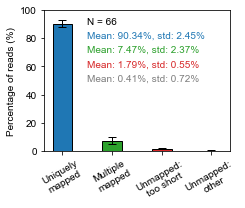

In [52]:
xs = np.arange(4)
ticks = ["Uniquely\nmapped", "Multiple\nmapped", "Unmapped:\ntoo short", "Unmapped:\nother"]
ys = m.mean()
yerr = m.std()
colors = ["C0", "C2", "C3", "C7"]

plt.figure(figsize=(3.5, 3))
plt.bar(xs, ys, yerr=yerr, width=0.4, edgecolor="black", color=colors, error_kw={"lw": 1, "capsize": 4})
plt.text(0.5, 90, "N = %d" % len(samples))
for i in range(4):
    plt.text(0.5, 80 - i * 10, "Mean: %.2f%%, std: %.2f%%" % (ys[i], yerr[i]), color=colors[i])
plt.xticks(xs, ticks, rotation=30)
plt.ylim(0, 100)
plt.ylabel("Percentage of reads (%)")
plt.tight_layout()
plt.savefig("figures/summary_of_star_mapping.pdf", dpi=300)